<a href="https://colab.research.google.com/github/chayan141/nlp-playlist/blob/main/NLP_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Rate Scheduling

Learning rate scheduling is a technique used in training machine learning models, particularly neural networks, to dynamically adjust the learning rate during training. The learning rate is a hyperparameter that controls how much the model's parameters (e.g., weights) are updated in response to the gradient of the loss function during optimization.

Early Training: A larger learning rate can help the model explore the parameter space quickly and escape suboptimal local minima.

Later training: A smaller learning rate allows the model to make finer adjustment and converging more precisely.

Methods:

1. Step decay: The learning rate is reduced by a fixed factor after a specified number of epochs or iterations.

  Example: learning rate is reduced by half for every 10 epoch.

2. Exponential Decay: Learning rate decreses exponentially over time. for smooth convergence.

3. Polynomial Decay: The learning rate decreases according to a polynomial function, often used in linear or power-law decay.

4. Cosine Annealing: The learning rate follows a cosine function, decreasing gradually at first, then rapidly, and slowing down again.

4. ReduceLRon Plateau: The learning rate is reduced when a monitored metric (e.g., validation loss) stops improving (plateaus).

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ReduceLROnPlateau, CSVLogger
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to binary classification (class 0 vs. others) for simplicity
y = (y == 0).astype(int)  # 1 if Iris-setosa, 0 otherwise

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [3]:
# Define a simple neural network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ExponentialDecay: A predefined schedule to decay the learning rate exponentially.


ReduceLROnPlateau: An adaptive schedule to reduce the learning rate when validation loss plateaus.

In [4]:
# Define ExponentialDecay schedule
initial_learning_rate = 0.1
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=1000,  # Decay after 1000 steps (iterations)
    decay_rate=0.9,    # Reduce learning rate by 10% per decay step
    staircase=False     # Continuous decay
)

In [5]:
# Define optimizer with the schedule
optimizer = SGD(learning_rate=lr_schedule)

In [6]:
# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,          # Reduce learning rate by a factor of 0.2
    patience=5,          # Wait 5 epochs before reducing
    min_lr=0.0001,       # Minimum learning rate
    verbose=1            # Print when learning rate is reduced
)

In [7]:
# Optional: CSVLogger to track learning rate and metrics
csv_logger = CSVLogger('training_log.csv')

In [8]:
# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16,
    callbacks=[reduce_lr, csv_logger],
    verbose=1
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8199 - loss: 0.5217 - val_accuracy: 0.9667 - val_loss: 0.4074 - learning_rate: 0.0999
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9389 - loss: 0.3833 - val_accuracy: 1.0000 - val_loss: 0.3136 - learning_rate: 0.0998
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9682 - loss: 0.2995 - val_accuracy: 1.0000 - val_loss: 0.2394 - learning_rate: 0.0997
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9946 - loss: 0.2360 - val_accuracy: 1.0000 - val_loss: 0.1741 - learning_rate: 0.0997
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9801 - loss: 0.1776 - val_accuracy: 1.0000 - val_loss: 0.1229 - learning_rate: 0.0996
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9871 - loss: 0.1231 - val_accuracy: 1.0000 - val_loss: 0.0865 - learning_rate: 0.0995
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0844 - val_accuracy: 1.0000 

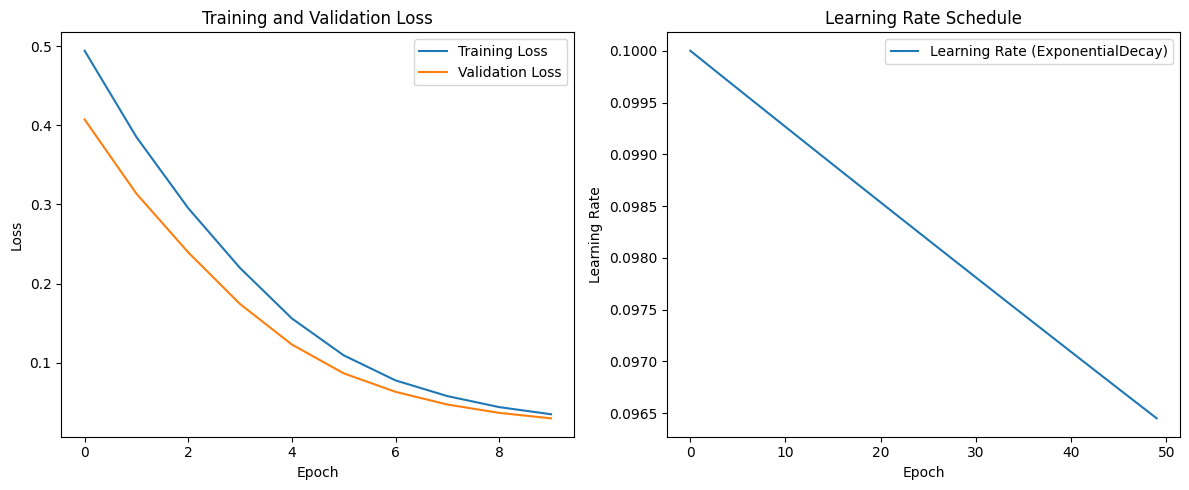

In [10]:
# Function to compute learning rate for ExponentialDecay
def get_lr_for_epoch(epoch, steps_per_epoch, initial_lr=0.1, decay_steps=1000, decay_rate=0.9):
    steps = epoch * steps_per_epoch
    lr = initial_lr * (decay_rate ** (steps / decay_steps))
    return lr

# Calculate steps per epoch
steps_per_epoch = len(X_train) // 16  # batch_size = 16

# Generate learning rates for plotting
epochs = range(50)
lrs = [get_lr_for_epoch(e, steps_per_epoch) for e in epochs]

# Plot loss and learning rate
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot learning rate
plt.subplot(1, 2, 2)
plt.plot(epochs, lrs, label='Learning Rate (ExponentialDecay)')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()

## Difference between GPT and BERT

GPT:

1. Decoder only transformer.
2. GPT uses a decoder-only transformer architecture, processing text in a left-to-right, autoregressive manner.(Unidirectional)

3. It is a generative model. Designed for generating text by predicting the next token in a sequence.

4. GPT is trained as CLM (Casual language modelling). Trained to predict the next word in a sequence give the previous word. (autoregressive).

5. Useful for generative tasks. Sequential output is needed.like chatbot.

6. Outputs probability distribution




BERT:

1. BERT uses an encoder-only transformer architecture, processing the entire input sequence simultaneously to capture context from both directions (left and right).(Bidirectional).

2. Designed to understand text.

3. Msked Language Modelling: Randomly masks some tokens in the input, and the model predicts the masked tokens based on bidirectional context.

4. Used for Next sentence prediction, QNA, Embedding Generation. Used for deep contextual understanding.
5. Outputs contextual embeddings.

BERT is trained on two methods ⁉
1. MLM : Randomly masks 15% of the tokens in the input (Replasing them with a [MASK].) The model predicts the masked tokens based on bidirectional context. This helps bert to learn contextual relationahip.

2. Next Sentence Prediction: Given two sentences, BERT predicts whether the second sentence follows the first (50% of the time, it does; 50% of the time, it’s a random sentence).

# Autoregressive

Output at given time step depends on the previous outputs/inut sequence.


autoregressive models generate or predict the next element in a sequence based on the elements that came before it, typically in a sequential, left-to-right manner.

An autoregressive model in time series, predicts the next value in the series based on the linear combination of previous values.

# Self Attention

Global Context: Each token attends to all other tokens in the sequence, capturing long-range dependencies.

Parallel Processing: Unlike RNNs, self-attention processes all tokens simultaneously, making it computationally efficient.

Dynamic Weighting: Attention weights are computed dynamically based on the input, allowing the model to focus on relevant tokens for each context.

It operates within a single sequence

Captures relationship between all tokens in the same sequence.

Q, K, V vector comes from same sequence.

All to All attention: Each token attends every other tokens.

Parallel processes entire sequence at once.

Efficient for long sequence due to parralization.

BERT: Bidirectional Self Attention
GPT: Casual Self Attention (Self attention is modified with a casual mask to ensure that each token only attends to previous tokens (unidirectional), aligning with the autoregressive nature.

# Cross Attention

It is also called encoder - decoder attention.

Used in encoder-decoder architectures, where the encoder processes the input sequence (e.g., source sentence in translation) and the decoder generates the output (e.g., target sentence).

The attention mechanism allows the decoder to focus on relevant parts of the encoded input at each decoding step.

Mechenism:

1. Encoder States: The encoder (e.g., an RNN or LSTM) produces a set of hidden states $ h_1, h_2, \ldots, h_n $ for the input sequence.

2. Decoder State: At each decoding step, the decoder has a hidden state $ s_t $.

3. Alignment Scores: Compute alignment scores between the decoder’s current state $ s_t $ and each encoder state $ h_i $:

4. Attention Weights: Normalize scores using softmax:

5. Context Vector: Context Vector: Compute a context vector as a weighted sum of encoder states:



Operates between two sequences (encoder and decoder).

Aligns source sequence (input) with target sequence (output).

Queries from decoder, keys/values from encoder states.

Used in RNN/LSTM-based encoder-decoder models.

Limited by sequential RNN processing, less efficient. (No Parallization)

Sequence-to-sequence tasks (e.g., translation, summarization).